# Emergency 911 Calls Project – Exploratory Analysis and Vizualization

**Note:** We perform exploratory data analysis on a dataset and create different figures. The data set was downloaded from Kaggle and it was made from emergency calls to 911 in Mongomery County, Pennsylvania. Here is the link: https://www.kaggle.com/datasets/mchirico/montcoalert.

## Importing Data + info on Data Set

**Note:** Here we import the dataset into the notebook and initialize the libraries we will be using.

In [34]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
data = pd.read_csv('911.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Note:** Here we check the head of the data set. The following columns are present: 'lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', and 'e'. Most of these are self explanatory however the 'title' column look likes it refers to the type of injury and the emergency service requested. Also, the 'twp' column refers to the specific township that the call was placed in and the 'e' column is just an index variable.

In [6]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Preliminary Questions:

**Q:** What are the top 5 zipcodes (zip) for 911 Calls?

In [7]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**A:** *The top zipcodes for calls were 19401 with 6979 calls, 19464 with 6643 calls, 19403 with 4853 calls, 19446 with 4748 calls, and 19406 with 3174 calls.*

**Q:** What are the top townships (twp) for 911 calls?

In [8]:
data['twp'].value_counts()[0:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**A:** *The top townships for calls to 911 are: Lower Merion, Abington, Norristown, Upper Merion, and Cheltenham.*

**Q:** how many unique title codes (title) are there?

In [9]:
data['title'].drop_duplicates().count()

110

**A:** *There are 110 unique title codes.*

## Analysis and More Questions:

**Note:** For each element in the **data['title']** column there is an associated reason or emergency department which are are 'EMS', 'Fire', and 'Traffic'. Below, we create a new column in the data frame called 'reason' that labels the specific need for each call to 911 given to us in the respective title code.

In [10]:
data['reason'] = data['title'].apply(lambda x: x.split(':')[0])
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**Q:** What is the most common Reason for a 911 call based off the **data['reason']** series?

In [11]:
data['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

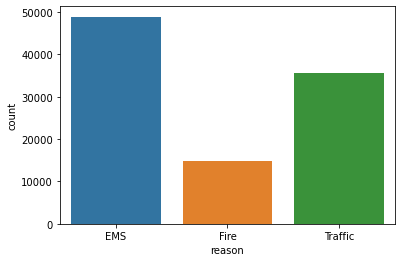

In [12]:
sns.countplot(x=data['reason'])

**A:** *The most common reason for calling 911 is needing the EMS department! There were 48,877 respective calls.*

**Note:** Here we have the first element of **data['timeStamp']** and we can see it is a string thus the entire column must be only strings.

In [13]:
type(data['timeStamp'].iloc[0])

str

**Note:** Obviously, strings are not ideal for working with. Let us change that by converting the entries in *data['timeStamp']* to *Timestamp objects*.

In [14]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**Note:** Now we will create three new columns in **data** called 'hour', 'month', and 'day of week'.

In [15]:
data['hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['month'] = data['timeStamp'].apply(lambda date: date.month)
data['day of week'] = data['timeStamp'].apply(lambda day: day.dayofweek)
data.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3


**Note:** We will now use a dictionary,
*daydictionary = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}*,
 to map each entry in *data['day of week']* to a string with the actual day of week.

In [16]:
daydictionary = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['day of week'] = data['day of week'].map(daydictionary)
data.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu


**Note:** Now we create a count plot and with the days of the week as the x-axis and we also make the hue to be the respective reason for each call. This gives us 3 different bars showing the number of calls for each day. 

Clearly, every day the EMS service gets the most calls while the Fire service gets the least. The lowest number of traffic calls occurs on Sunday. We can probably assume less people are on the road then.

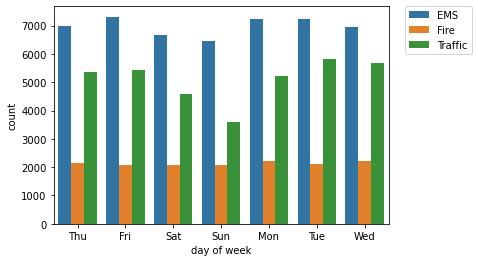

In [17]:
sns.countplot(data = data, x='day of week', hue = 'reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Note:** Here we do something similar with a count plot except we plot the x-axis as the month and the hue being the respective 911 call reason.

It seems the dataset is missing entries for the months of September (9), October (10), and November(11).

There seems to be a general trend of needing the EMS service until about August where it looks like it starts to taper off, however this is based on looking at just August and December since we are missing several months.

The highest number of calls to 911 due to traffic services took place in January so it would be interesting to compare this to weather data since this takes place in Pennsylvania and January is obviously happens in the Winter.

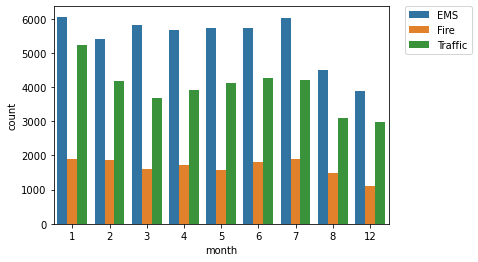

In [18]:
sns.countplot(data = data, x='month', hue = 'reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Note:** We now create a new dataframe object called **byMonth** which groups **data** by the month column and uses the count method to aggregate the entries. 

In [19]:
byMonth = data.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Note:** We now create a plot using byMonth['lat']. Our choice of the 'lat' column is arbitrary since all the columns look relativly close together numerically for each month and we are just looking for general trends.

The most number of calls to 911 occurs in January while the least amount of calls occurs in December. It looks like there is a local maximum around June/July as well. 

The rate of calls decreases until March and then increases again after March. The greatest rate of calls to 911 increases around May only to sharply decrease after July.

<AxesSubplot:xlabel='month'>

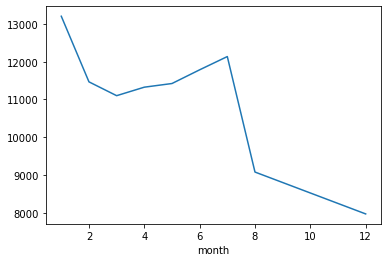

In [20]:
byMonth['lat'].plot()

**Note:** We create a linear fit plot on the number of calls per month. We also reset the index because previously **byMonth** was indexed by the month column.

According to the line of best fit, the plot follows the general trend that we have seen thus far. That is, decreasing from 0 to 12, however the error estimate increases greatly around 9, 10, and 11 due to missing data for those months.

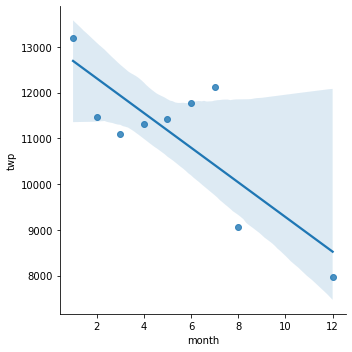

In [21]:
sns.lmplot(data = byMonth.reset_index(), x = 'month', y = 'twp')

**Note:** We create a new column called 'date' which contains the actual date from the 'timeStamp' column. We fill the new column with Date objects derived from the respective TimeStamp objects. Earlier, we converted the elements in **data['timeStamp']** from String objects to TimeStamp objects which is different from a Date object.

In [22]:
data['date'] = data['timeStamp'].apply(lambda x: x.date())
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**Note:** We apply the groupby method to the 'date' column and use count() to aggregate the calls.

In [23]:
byDate = data.groupby('date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


**Note:** We again choose an arbitrary column, 'lat' in this case, since all the columns are similar numerically and we are just looking for a trend. We then create a plot using the grouped and aggregated **byDate** data frame.

We see the largest spike in calls occuring around January, 2016 which fits everything we have seen so far.

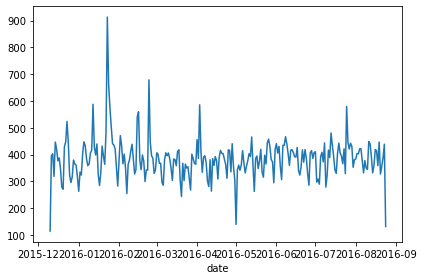

In [24]:
byDate['lat'].plot()
plt.tight_layout()

**Note:** We then create 3 seperate plots where each of the plots corresponds to a specific reason for the call to 911 such as 'Traffic', 'EMS', and 'Fire'.

The only plot that doesnt show that many dramatic spikes in the number of calls is the EMS plot. The number of calls is bounded between about 125 to 250 which is by far the most narrow range.

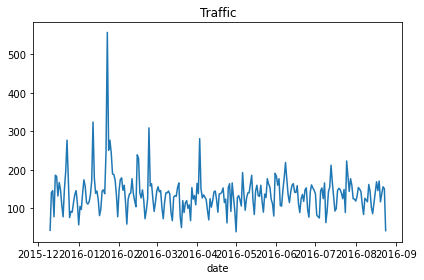

In [25]:
data[data['reason'] == 'Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

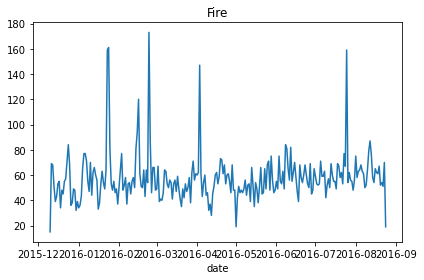

In [26]:
data[data['reason'] == 'Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

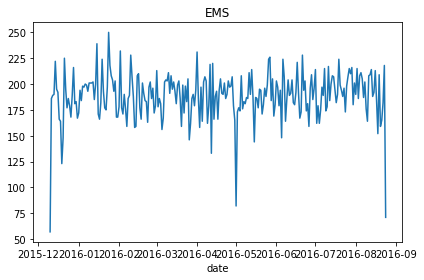

In [27]:
data[data['reason'] == 'EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

**Note:** We make a new dataframe called day_hour_data by organizing the data using the groupby() method with 'day of week' and 'hour' and then applying the unstack() method to get the dataframe in matrix form.

In [28]:
day_hour_data = data.groupby(by = ['day of week', 'hour']).count()['reason'].unstack()
day_hour_data.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Note:** We then create a heat map using the new dataframe. From hours 23 to 5 there are not many calls for all the days however there are not many calls in general for Sun and Sat. The hours with the most number of calls are 17 and 18 with a decrease from hours 19 to 23.

<AxesSubplot:xlabel='hour', ylabel='day of week'>

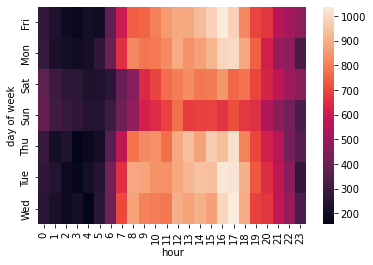

In [29]:
sns.heatmap(day_hour_data)

**Note:** We create a clustermap using day_hour_data which shows us our prior observations in more detail.

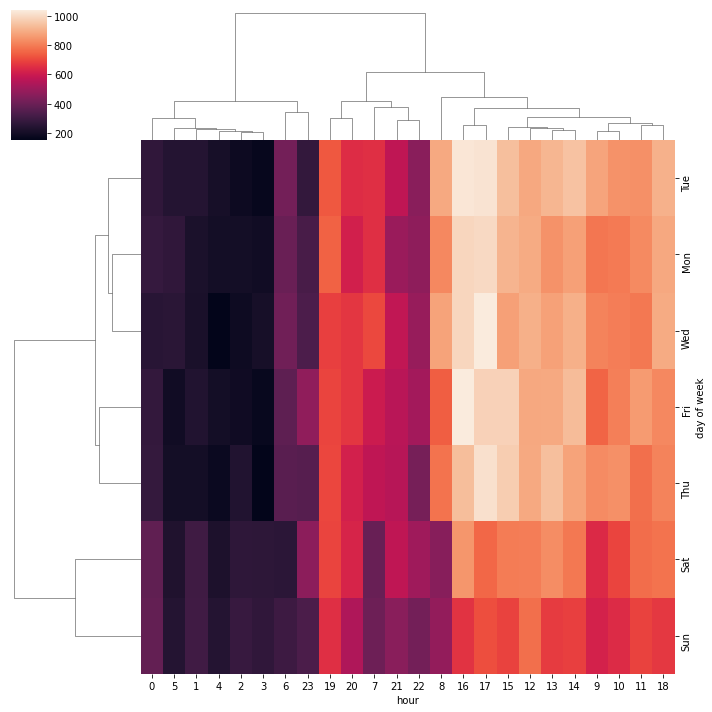

In [30]:
sns.clustermap(day_hour_data)

**Note:** We make a new DataFrame called month_hour_data by organizing the data using the groupby() method with 'month' and 'hour' and then applying the unstack() method to get the dataframe in matrix form.

In [31]:
month_hour_data = data.groupby(by = ['month', 'hour']).count()['reason'].unstack()
month_hour_data.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,294,218,225,205,205,214,386,551,755,752,...,775,691,725,871,798,687,592,507,421,345
2,267,194,161,149,161,213,325,550,597,603,...,648,704,692,674,693,578,518,453,426,327
3,214,181,194,149,152,181,291,487,556,614,...,672,707,782,676,600,547,493,402,359,273
4,243,204,170,161,179,178,316,482,613,598,...,705,728,767,728,646,533,472,377,309,282
5,255,195,158,173,160,196,254,439,605,644,...,640,746,728,787,608,510,489,462,405,283


**Note:** We then create a heat map using this dataframe.

<AxesSubplot:xlabel='hour', ylabel='month'>

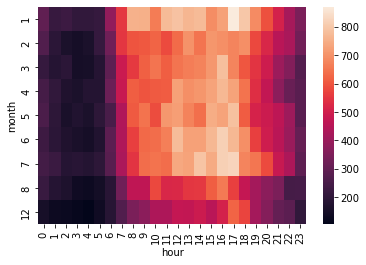

In [32]:
sns.heatmap(month_hour_data)

**Note:** Similarly, we create a clustermap using the month_hour_data DataFrame.

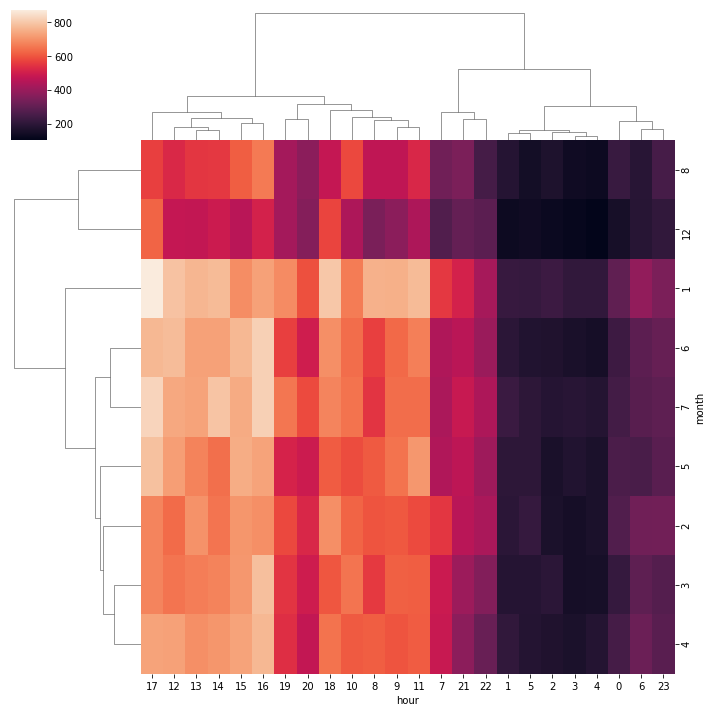

In [33]:
sns.clustermap(month_hour_data)